In [1]:
import findspark
findspark.init()
import pyspark

conf = pyspark.SparkConf()
conf.setAppName('Sample machine learning')
conf.set("spark.cores.max", "16")
conf.set("spark.yarn.executor.memoryOverhead", "0")
conf.set("spark.yarn.executor.memory", "512M")
conf.set("spark.yarn.driver.memory", "512M")
conf.set("spark.submit.deployMode", "client")
# sc.stop()
# sc = pyspark.SparkContext(conf=conf)
sc = pyspark.SparkContext.getOrCreate(conf=conf)

In [2]:
# import findspark
# findspark.init()
# import pyspark
# conf = pyspark.SparkConf()
# conf.setMaster('yarn')
# conf.setAppName('My Jupyter Notebook')
# conf.set("spark.cores.max", "16")
# conf.set("spark.yarn.executor.memoryOverhead", "0")
# conf.set("spark.yarn.executor.memory", "512M")
# conf.set("spark.yarn.driver.memory", "512M")
# conf.set("spark.submit.deployMode", "client")
# # sc.stop()
# sc = pyspark.SparkContext(conf=conf)

In [3]:
# Python version
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy
print('numpy: {}'.format(numpy.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas
print('pandas: {}'.format(pandas.__version__))
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))

Python: 3.5.3 (default, Jan 19 2017, 14:11:04) 
[GCC 6.3.0 20170124]
scipy: 1.0.0
numpy: 1.14.1
matplotlib: 2.1.2
pandas: 0.22.0
sklearn: 0.19.1


In [4]:
import pandas
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from matplotlib.pyplot import plot, draw, show
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [5]:
import time
start = time.time()

In [6]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'class']
dataset = pandas.read_csv(url, names=names)

In [7]:
dataset.shape

(150, 5)

In [8]:
dataset.describe()

,sepal-length,sepal-width,petal-length,petal-width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


sepal-length       AxesSubplot(0.125,0.536818;0.352273x0.343182)
sepal-width     AxesSubplot(0.547727,0.536818;0.352273x0.343182)
petal-length          AxesSubplot(0.125,0.125;0.352273x0.343182)
petal-width        AxesSubplot(0.547727,0.125;0.352273x0.343182)
dtype: object

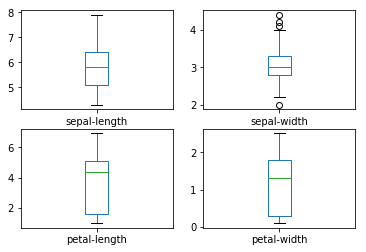

In [9]:
dataset.plot(kind='box', subplots=True, layout=(2,2), sharex=False, sharey=False)
# draw()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x6b7e5450>,
      dtype=object)

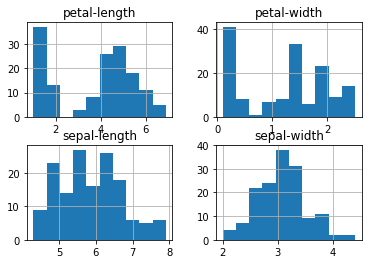

In [10]:
dataset.hist()
# draw()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x6b696230>,
      dtype=object)

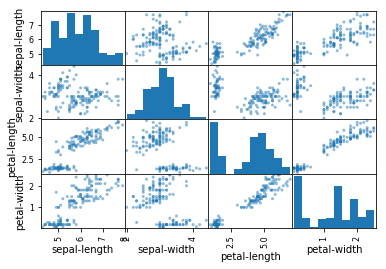

In [11]:
scatter_matrix(dataset)
# draw()

In [12]:
# Split-out validation dataset
array = dataset.values
X = array[:,0:4]
Y = array[:,4]
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [13]:
scoring = 'accuracy'

In [14]:
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

LR: 0.966667 (0.040825)
LDA: 0.975000 (0.038188)
KNN: 0.983333 (0.033333)
CART: 0.975000 (0.038188)
NB: 0.975000 (0.053359)
SVM: 0.991667 (0.025000)


[Text(0,0,'LR'),
 Text(0,0,'LDA'),
 Text(0,0,'KNN'),
 Text(0,0,'CART'),
 Text(0,0,'NB'),
 Text(0,0,'SVM')]

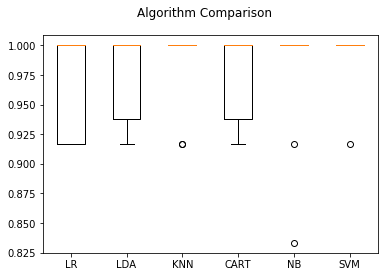

In [15]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
# draw()

In [16]:
# Make predictions on validation dataset
knn = KNeighborsClassifier()
knn.fit(X_train, Y_train)
predictions = knn.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.9
[[ 7  0  0]
 [ 0 11  1]
 [ 0  2  9]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         7
Iris-versicolor       0.85      0.92      0.88        12
 Iris-virginica       0.90      0.82      0.86        11

    avg / total       0.90      0.90      0.90        30



In [17]:
end = time.time()
elapsed = end - start
print(elapsed)

# show()

15.955949544906616
